
Kernel Perceptron Results:

γ	Train Error	Test Error	Epochs to Converge
------------------------------------------------------------
0.1	0.0000		0.0020		2


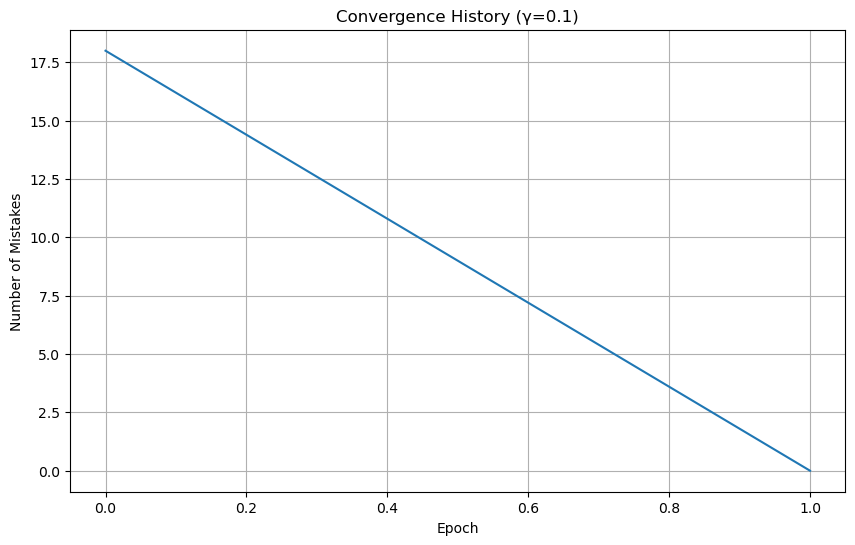

0.5	0.0000		0.0040		2


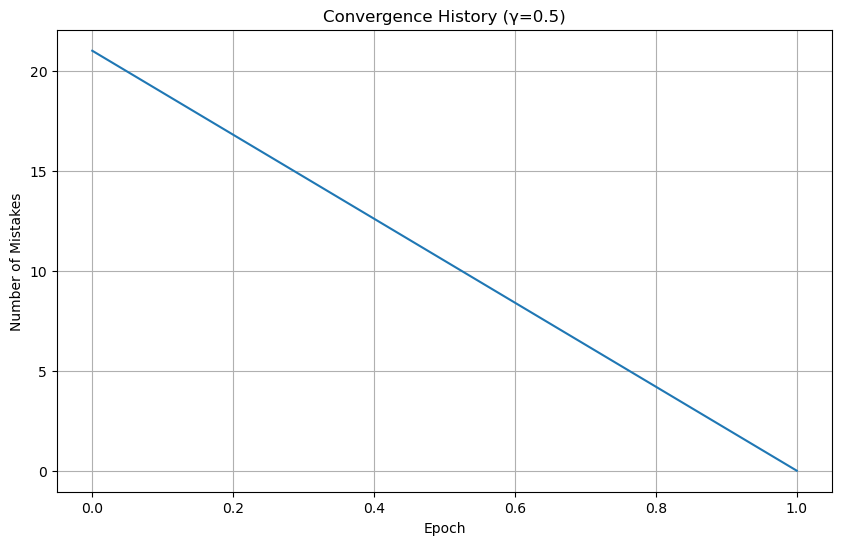

1.0	0.0000		0.0040		2


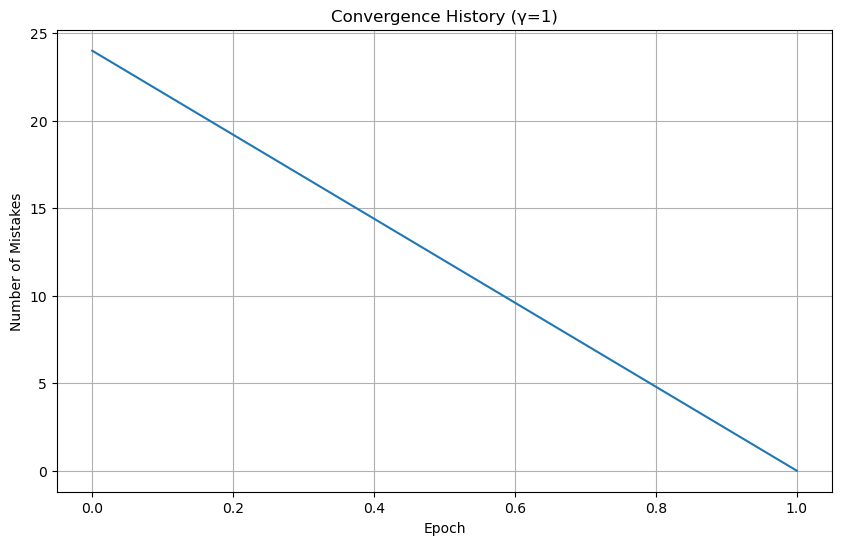

5.0	0.0000		0.0020		3


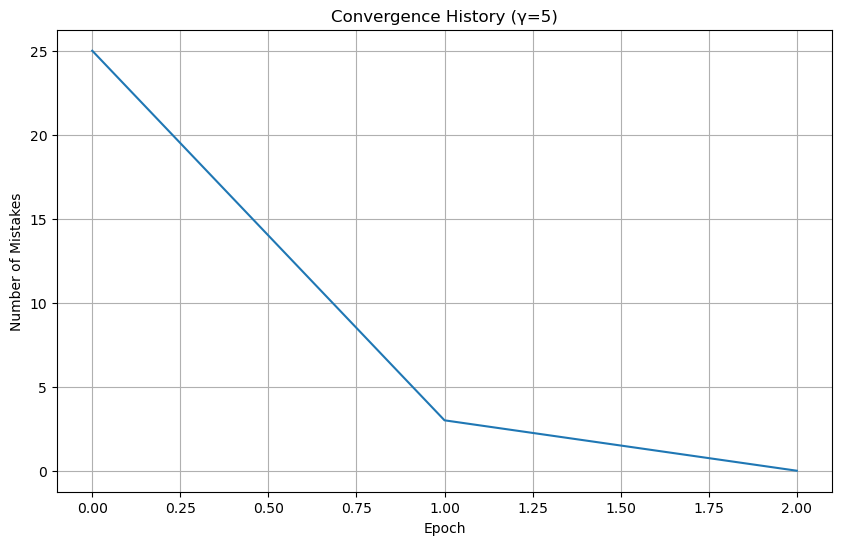

100.0	0.0000		0.0080		3


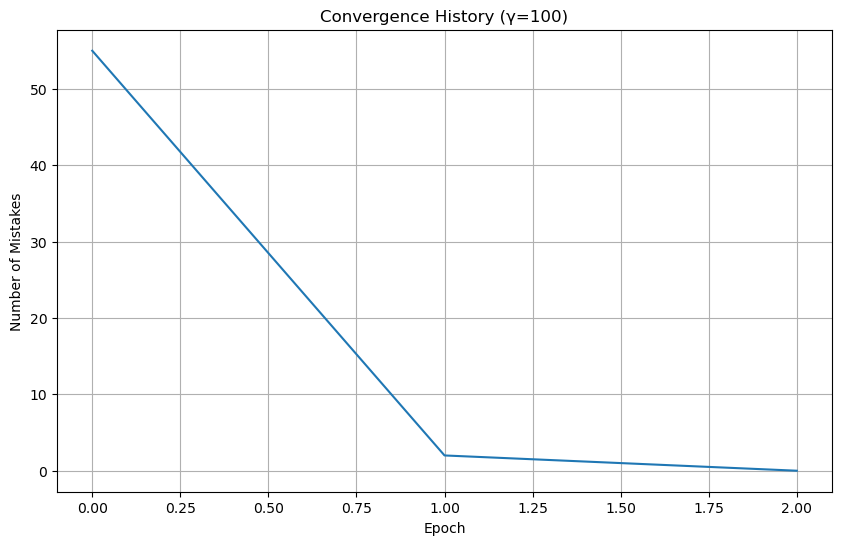

In [1]:
import numpy as np
from typing import Tuple
import matplotlib.pyplot as plt

class KernelPerceptron:
    def __init__(self, gamma: float, max_epochs: int = 100):
        """
        Initialize Kernel Perceptron.
        
        Args:
            gamma: Parameter for Gaussian kernel
            max_epochs: Maximum number of epochs
        """
        self.gamma = gamma
        self.max_epochs = max_epochs
        self.mistake_counts = None
        self.X_train = None
        self.y_train = None
        
    def _gaussian_kernel(self, x1: np.ndarray, x2: np.ndarray) -> float:
        """
        Compute Gaussian kernel between x1 and x2.
        K(x1, x2) = exp(-γ||x1 - x2||²)
        """
        return np.exp(-self.gamma * np.sum((x1 - x2) ** 2))
    
    def _compute_kernel_matrix(self, X1: np.ndarray, X2: np.ndarray) -> np.ndarray:
        """Compute kernel matrix between X1 and X2."""
        n1, n2 = len(X1), len(X2)
        K = np.zeros((n1, n2))
        for i in range(n1):
            for j in range(n2):
                K[i,j] = self._gaussian_kernel(X1[i], X2[j])
        return K
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        """
        Train the kernel Perceptron.
        
        Args:
            X: Training features (n_samples, n_features)
            y: Training labels {-1, 1} (n_samples,)
        """
        n_samples = len(X)
        self.X_train = X
        self.y_train = y
        self.mistake_counts = np.zeros(n_samples)
        
        # Pre-compute kernel matrix for efficiency
        K = self._compute_kernel_matrix(X, X)
        
        # Track number of mistakes per epoch for convergence monitoring
        mistakes_history = []
        
        for epoch in range(self.max_epochs):
            mistakes = 0
            
            for i in range(n_samples):
                # Compute prediction
                prediction = np.sign(np.sum(
                    self.mistake_counts * y * K[:, i]
                ))
                
                # Update mistake count if misclassified
                if y[i] * prediction <= 0:
                    self.mistake_counts[i] += 1
                    mistakes += 1
            
            mistakes_history.append(mistakes)
            
            # Check for convergence (no mistakes in this epoch)
            if mistakes == 0:
                break
        
        return mistakes_history
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Make predictions for test data.
        
        Args:
            X: Test features (n_samples, n_features)
            
        Returns:
            Predicted labels {-1, 1} (n_samples,)
        """
        n_samples = len(X)
        predictions = np.zeros(n_samples)
        
        # Compute kernel between training and test data
        K = self._compute_kernel_matrix(self.X_train, X)
        
        # Make predictions
        for i in range(n_samples):
            predictions[i] = np.sign(np.sum(
                self.mistake_counts * self.y_train * K[:, i]
            ))
            
        return predictions
    
    def score(self, X: np.ndarray, y: np.ndarray) -> float:
        """Calculate accuracy score."""
        return np.mean(self.predict(X) == y)

def load_and_preprocess_data(train_path: str, test_path: str) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """Load and preprocess the banknote data."""
    train_data = np.loadtxt(train_path, delimiter=',')
    test_data = np.loadtxt(test_path, delimiter=',')
    
    X_train, y_train = train_data[:, :-1], train_data[:, -1]
    X_test, y_test = test_data[:, :-1], test_data[:, -1]
    
    # Convert labels to {-1, 1}
    y_train = 2 * y_train - 1
    y_test = 2 * y_test - 1
    
    return X_train, y_train, X_test, y_test

def plot_mistakes_history(mistakes_history: list, gamma: float):
    """Plot the number of mistakes per epoch."""
    plt.figure(figsize=(10, 6))
    plt.plot(mistakes_history)
    plt.xlabel('Epoch')
    plt.ylabel('Number of Mistakes')
    plt.title(f'Convergence History (γ={gamma})')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    # Load and preprocess data
    X_train, y_train, X_test, y_test = load_and_preprocess_data('train.csv', 'test.csv')
    
    # Test different gamma values
    gamma_values = [0.1, 0.5, 1, 5, 100]
    
    print("\nKernel Perceptron Results:")
    print("\nγ\tTrain Error\tTest Error\tEpochs to Converge")
    print("-" * 60)
    
    for gamma in gamma_values:
        # Train kernel perceptron
        perceptron = KernelPerceptron(gamma=gamma)
        mistakes_history = perceptron.fit(X_train, y_train)
        
        # Calculate errors
        train_error = 1 - perceptron.score(X_train, y_train)
        test_error = 1 - perceptron.score(X_test, y_test)
        epochs_to_converge = len(mistakes_history)
        
        print(f"{gamma:.1f}\t{train_error:.4f}\t\t{test_error:.4f}\t\t{epochs_to_converge}")
        
        # Plot convergence history
        plot_mistakes_history(mistakes_history, gamma)